Aprendizaje batch vs online vs SDG vs minibatch
===

* Ultima modificación: Marzo 24, 2021

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

## Dataset utilizado

En esta lección se considera el problema de regresión lineal que se resolvio en una lección anterior.

In [2]:
x = [
    0.1087,
    0.2698,
    0.3765,
    0.2146,
    0.9155,
    0.0246,
    0.0221,
    0.8632,
    0.6460,
    0.2092,
    0.8567,
    0.1591,
    0.9647,
    0.6231,
    0.7460,
    0.3654,
    0.3065,
    0.6886,
    0.4966,
    0.2008,
    0.2618,
    0.7607,
    0.1563,
    0.4424,
    0.7731,
]

d = [
    0.9519,
    1.1237,
    1.2360,
    1.0526,
    2.0743,
    0.7906,
    0.7603,
    2.0533,
    1.6887,
    1.0563,
    2.0991,
    0.8953,
    2.1917,
    1.6266,
    1.8508,
    1.2828,
    1.2283,
    1.8722,
    1.4657,
    1.0418,
    1.1097,
    1.7826,
    0.9711,
    1.4267,
    1.8248,
]

## Aprendizaje batch

En aprendizaje de máquinas, el término *Batch* se refiere a que los parámetros del modelo son actualizados con base a una corrección neta computada sobre el conjunto de datos de entrenamiento; este es el caso del algoritmo de gradiente descendente presentado en la lección de *Estimación de Parámetros en Modelos de Regresión*. 

En este caso, se minimiza la suma de errores al cuadrado (SSE):

$$
\begin{split}
\text{SSE}(w_0, w_1) & = \sum_i (d_i - y_i)^2 \\
    & =  \sum_i (d_i - w_0 - w_1 x_i)^2 \\
    & =  \sum_i [e_i(w_0, w_1)]^2 \\
\end{split}
$$

donde $e_i$ se define como el error instantáneo para el patrón $i$ y es función de $w_0$ y $w_1$.

La implementación realizada se resume en el siguiente código, realizando el correspondiente ajuste de los nombres de las funciones donde sea necesario:

w0 = 0.675531238843588; w1 = 1.6432693468565847; SSE = 0.09853907887667793


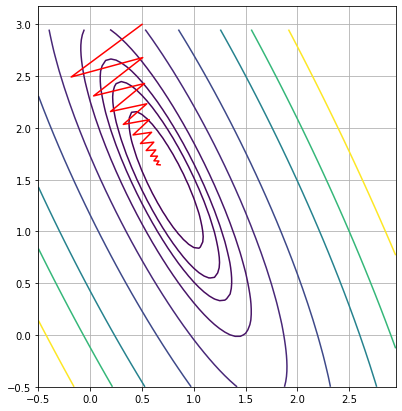

In [3]:
def SSE(w0, w1):
    return sum([(di - w0 - w1 * xi) ** 2 for xi, di in zip(x, d)])


def plot_contour():

    W0 = np.arange(-0.5, 3.0, 0.05)
    W1 = np.arange(-0.5, 3.0, 0.05)
    W0, W1 = np.meshgrid(W0, W1)
    F = SSE(W0, W1)

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_aspect("equal", "box")
    ax.contour(W0, W1, F, levels=[0, 1, 2, 3, 5, 10, 20, 40, 60, 90])
    ax.grid()


def grd_batch(w0, w1):
    e = [(di - w0 - w1 * xi) for xi, di in zip(x, d)]
    gw0 = -2 * sum(e)
    gw1 = -2 * sum([ei * xi for ei, xi in zip(e, x)])
    return gw0, gw1


def mejora_batch(w0, w1, mu):
    gw0, gw1 = grd_batch(w0, w1)
    w0 = w0 - mu * gw0
    w1 = w1 - mu * gw1
    return w0, w1


w0 = 0.5
w1 = 3.0

history_w0 = [w0]
history_w1 = [w1]
history_f = [SSE(w0, w1)]

for epoch in range(20):
    w0, w1 = mejora_batch(w0, w1, 0.03)
    history_w0.append(w0)
    history_w1.append(w1)
    history_f.append(SSE(w0, w1))

print("w0 = {}; w1 = {}; SSE = {}".format(w0, w1, SSE(w0, w1)))

plot_contour()
plt.plot(history_w0, history_w1, color="red");

## Aprendizaje Online

En el aprendizaje online, la corrección de los parámetros $w_0$ y $w_1$ se realiza usando el error instantáneo y no sobre la suma neta de las correcciones. Es decir, en el aprendizaje batch se usa:

$$
\begin{split}
\text{SSE}(w_0, w_1) & = \sum_i (d_i - y_i)^2 \\
    & =  \sum_i (d_i - w_0 - w_1 x_i)^2 \\
    & =  \sum_i [e_i(w_0, w_1)]^2 \\
\end{split}
$$

donde $e_i(w_0, w_1)$ es el error instantáneo del patrón $i$.

De esta forma, el algoritmo de gradiente descendente corrige los parámetros $w_0$ y $w_1$ usando:

$$
\mathbf{w}_k 
  = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} e_i^2(\mathbf{w}_{k-1})
$$

donde $i$ representa un patrón de los datos. En este caso, $i=0, 1, ...$ (recorre los enteros de forma ordenada), y una vez se llega al útimo patrón, su valor vuelve a cero y repite la secuencia.

w0 = 0.6542495303675029; w1 = 1.642800272157345; SSE = 0.09904548922294656


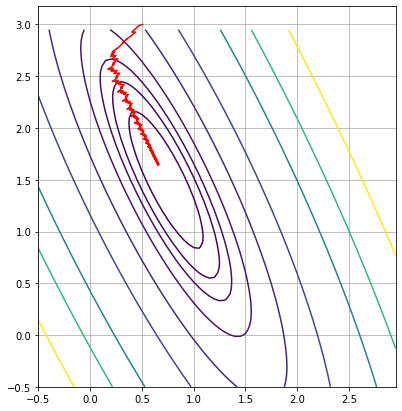

In [4]:
#
# Calcula el gradiente para el punto actual (xi, di)
#
def grd_online(xi, di, w0, w1):
    #
    # Calculo del error instantáneo
    #
    e = di - w0 - w1 * xi

    #
    # Gradientes
    #
    gw0 = -2 * e
    gw1 = -2 * e * xi

    return gw0, gw1


def mejora_online(xi, di, w0, w1, mu):
    #
    # Computa el gradiente para los parámetros actuales
    #
    gw0, gw1 = grd_online(xi, di, w0, w1)

    #
    # Corrección de los parámetros
    #
    w0 = w0 - mu * gw0
    w1 = w1 - mu * gw1

    #
    # Parámetros corregidos
    #
    return w0, w1


#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history_w0 = []
history_w1 = []
history_f = []

for epoch in range(20):
    #
    # Recorre los puntos (xi, di) del dataset en orden
    #
    for xi, di in zip(x, d):
        w0, w1 = mejora_online(xi, di, w0, w1, 0.03)
        history_w0.append(w0)
        history_w1.append(w1)
        history_f.append((di - w0 - w1 * xi) ** 2)

print("w0 = {}; w1 = {}; SSE = {}".format(w0, w1, SSE(w0, w1)))

plot_contour()
plt.plot(history_w0, history_w1, color="red")
plt.show()

Note que en la figura anterior, el error oscila punto a punto con cada dato del dataset. Sin embargo, la forma del patrón de error es repetitiva ya que los datos son recorridos en orden. En la siguiente figura puede observarse como deciende el error aunque existe el patrón repetitivo en su forma.

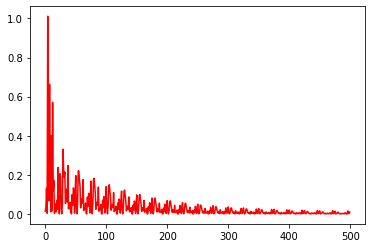

In [5]:
plt.plot(history_f, color="red")
plt.show()

## Gradiente Descendente Estocástico

El método del gradiente descendente estocástico es el método de aprendizaje online en el que los patrones se recorren de forma aleatoria.

w0 = 0.6465869422913014; w1 = 1.675291007768305; SSE = 0.11877730442675581


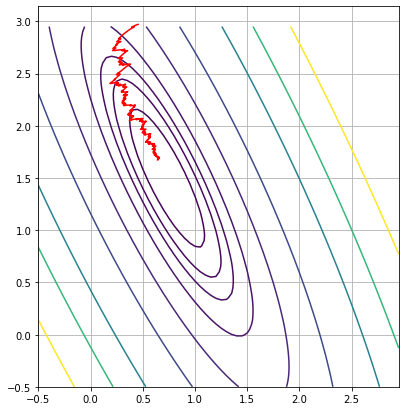

In [8]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history_w0 = []
history_w1 = []
history_f = []

for epoch in range(20):

    #
    # Recorre todos los puntos del dataset en
    # orden aleatorio
    #
    for n in np.random.choice(len(d), len(d)):

        w0, w1 = mejora_online(x[n], d[n], w0, w1, 0.03)
        history_w0.append(w0)
        history_w1.append(w1)
        history_f.append((d[n] - w0 - w1 * x[n]) ** 2)

print("w0 = {}; w1 = {}; SSE = {}".format(w0, w1, SSE(w0, w1)))

plot_contour()
plt.plot(history_w0, history_w1, color="red")
plt.show()

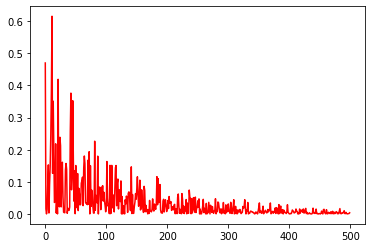

In [9]:
plt.plot(history_f, color="red")
plt.show()

## Minibatch

Para conjuntos de datos muy grandes el aprendizaje batch es muy costoso computacionalmnete ya que deben recorrerse todos los datos, mientras que el aprendizaje online es muy lento en converger (compare los gráficos de los ejemplos anteriores). Es en este caso, donde se toma un punto intermedio: 

* El conjunto de datos se divide en varios subconjuntos.

* Se ordenan aleatoriamente los subconjuntos de datos y luego se recorren uno a uno, tal como en el caso del gradiente descendente estocástico.

* Para el subconjunto actual, se computa el gradiente neto (tal como en el caso del aprendizaje batch) y se corrigen los parámetros.

* Se repite nuevamente el proceso hasta que el algoritmo converga.